In [415]:
#### Project 3
#### Haitian Hao, Tuo Hu

In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [417]:
# Exercise 1
data = pd.read_csv('gap.tsv', sep='\t')

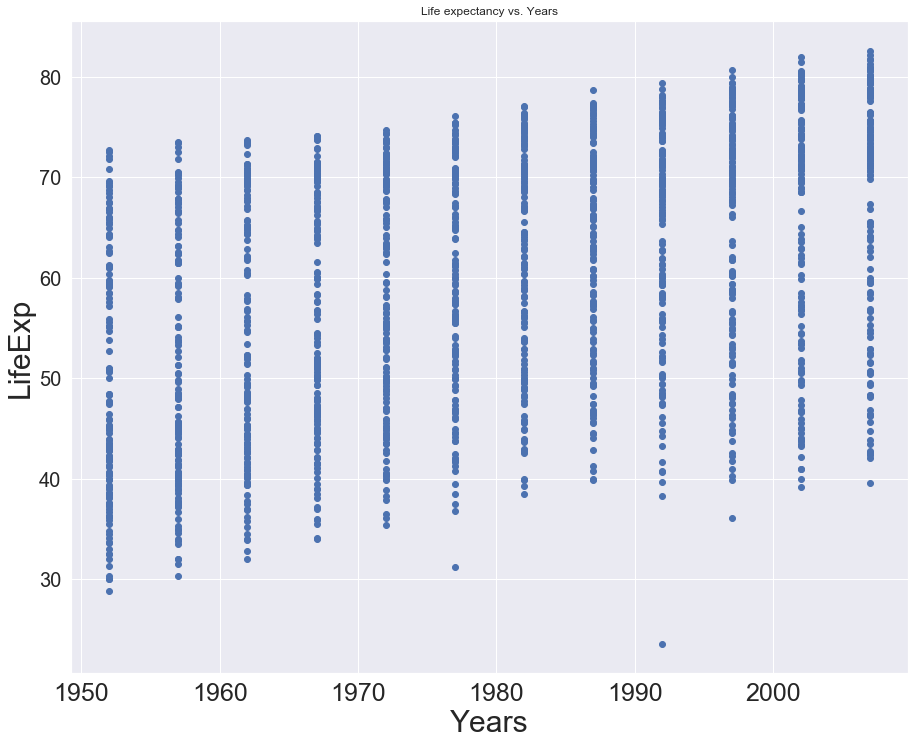

In [418]:
plt.figure(figsize=(15,12))
plt.scatter(data.year, data.lifeExp)
plt.xlabel("Years")
plt.ylabel("LifeExp")
plt.title("Life expectancy vs. Years")
plt.show()

In [419]:
# Question 1
# Generally, the life expectancy is increasing over the years. The mean of life expectancy each year is increasing.
# The trend seems to be linear.

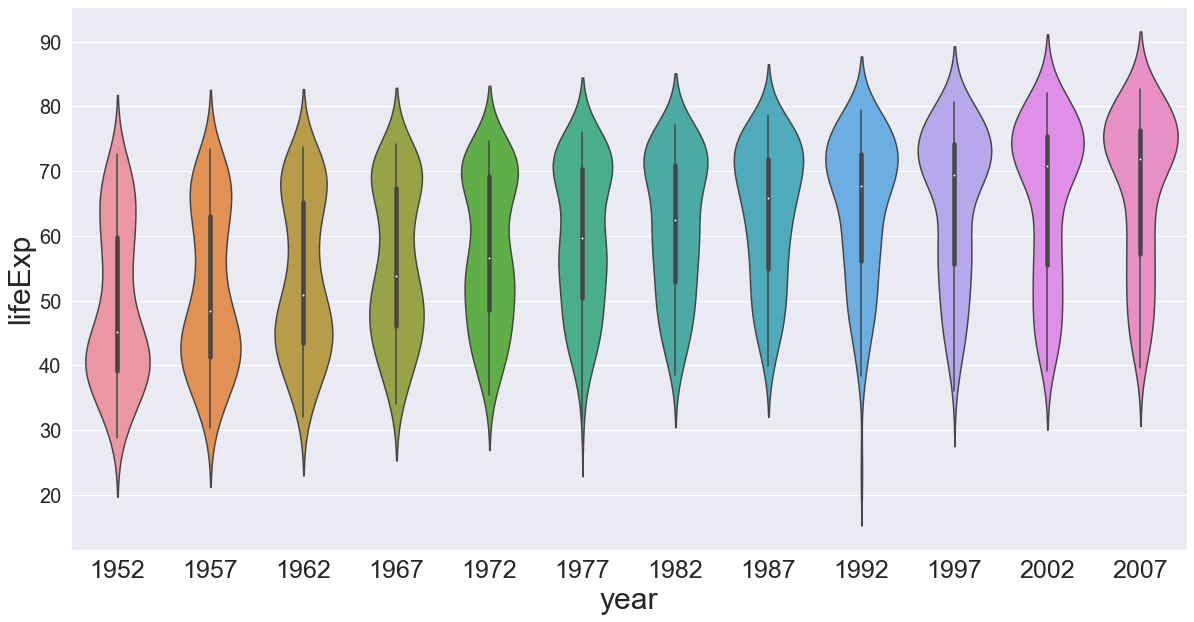

In [420]:
# from ggplot import *

lifeexp_vs_year = data[['year','lifeExp']].sort_values('year').reset_index(drop=True)

# ggplot(aes(x='year', y='lifeExp'), data = lifeexp_vs_year) +\
#     geom_violin() +\
#     labs(title="Life expectancy over time",
#          x = "year",
#          y = "life expectancy")

sns.set(rc={
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})
violin_life = sns.violinplot(data=data,
                   x = 'year',
                   y = 'lifeExp',
                   fliersize=50)

In [421]:
# Question 2
# The distribution of life expectancy across countries for individual years is unimodel in a period and bimodel in
# another. From 1952 to 1977, the distribution is bimodel, there are two peaks at the top and the bottom. From 1982
# to 2007, the distribution is generally unimodel, and peak is found at a spot with a higher life expectancy. There
# is also an overall increasing trend, whhich seems to be linear. The distribution is not symmetric around the center.

In [422]:
# Question 3
# I am going to reject the null hypothesis, since the distribution is obviously linear to me.

In [423]:
# Question 4
# I think the violin plot the violin plot of residuals from the linear model in Question 3 vs. year should have an
# ambiguous shape of that of the violin plot I already graphed. The reason is residuals represent the difference or 
# distance from the prediction, and each observation produces one residual. The mean and sum of the residuals should 
# be close to 0. There should be a linear trend among the means.

In [424]:
# Question 5
# Ideally all residuals should be small and unstructured.
# The plot should have a linear increasing trend, the reason is that the upper part of the violins are getting heavier
# across the time, the best-fit line will have to follow this trend and present as a linear line. Also, the shape of the
# violins should look similar to that of the violins in this lifeExp - Year graph.

In [425]:
# Exercise 2
from sklearn.linear_model import LinearRegression
year_series = lifeexp_vs_year[['year']].values
lifeexp_series = lifeexp_vs_year[['lifeExp']].values
reg = LinearRegression().fit(year_series, lifeexp_series)

# The coefficient and intercept are attained from the regression model
coeff = reg.coef_[0][0]
intercept = reg.intercept_[0]

print("The regression line is y = {0}x + ({1})".format(coeff, intercept))

The regression line is y = 0.3259038276371515x + (-585.6521874415441)


In [426]:
# Question 6
import statsmodels.formula.api as sm

regression = sm.ols(formula="lifeExp ~ year ", data=lifeexp_vs_year).fit()
regression.summary()

# The coefficient value from this model and the previous exercise are both 0.3259. So on average,
# life expectancy increase by 0.3259 every year around the world.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Wed, 03 Jul 2019   Prob (F-statistic):           7.55e-80
Time:                        23:21:05   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.000    -649.031    -522.273
year           0.3259      0.016     19.965      0.000       0.294       0.358
==============================================================================
Omnibus:                      386.124   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.750
Skew:                          -0.268   Prob(JB):                     1.97e-20
Kurtosis:                       2.004   Cond. No.                     2.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [427]:
# Question 7
# Reject the null hypothesis. Obviously, there is a clear linear regression model that fits the data here and we
# already calculated its equation. Also, the p-value is 0, which means we need to reject the null hypothesis.

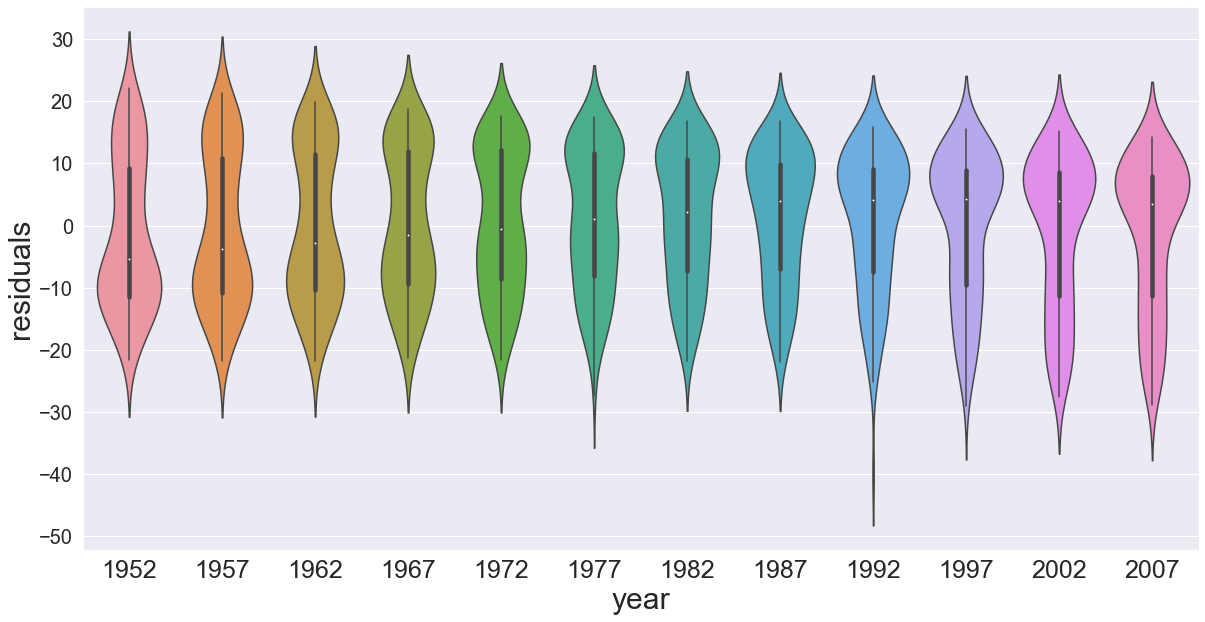

In [428]:
# Exercise 3
data2 = data.copy()
data2['residuals'] = data['lifeExp'] - (intercept + coeff * data['year'])

violin_residuals = sns.violinplot(data=data2,
                   x = 'year',
                   y = 'residuals',
                   fliersize=50)

In [429]:
# Question 8
# We can see from the plot that the mean and sum of residuals for each year are closed to 0. Some of the violin-shapes
# are symmetric while others are not. The pattern is that over the years, people's life expectancy is increasing, more
# are gathered around the upper part of the violins. The same pattern exists in this violin_residuals graph as well. We
# can see that the violins are changing graudally from heavy-bottom to heavy-head, and they are basically located around
# the vertical line y = 0. Also, the shape of the violins are quite respectively similar to those in the previous violin
# plot.

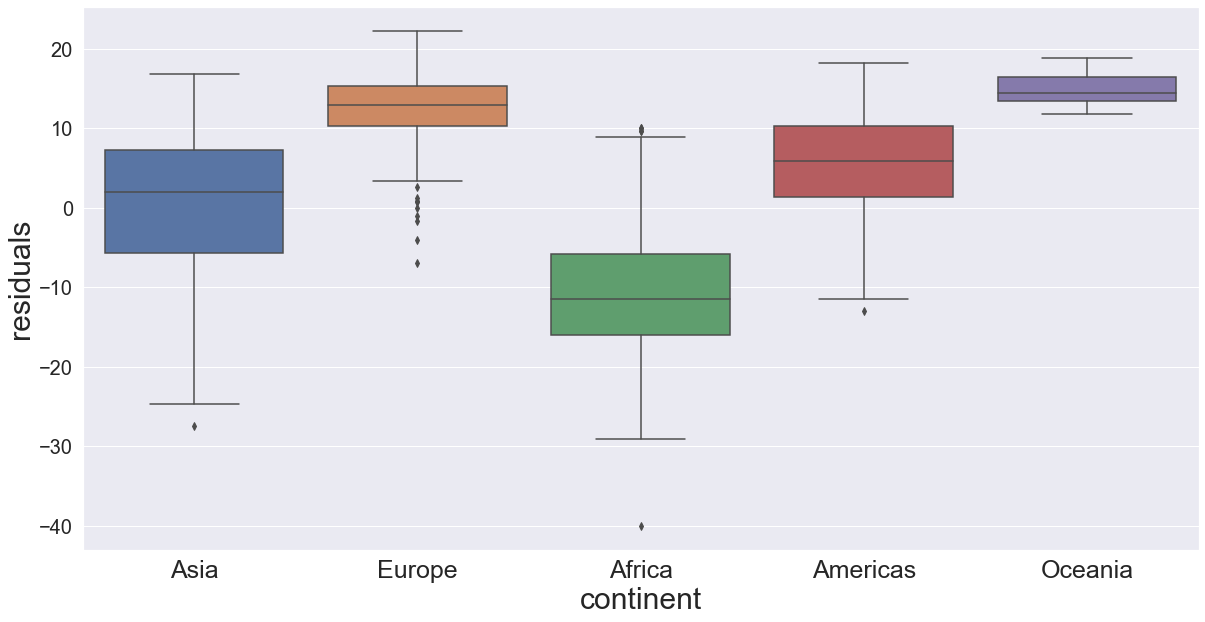

In [430]:
# Exercise 4
# Draw a boxplot with seaborn again
box_continent = sns.boxplot(data=data2,
                   x = 'continent',
                   y = 'residuals')

In [431]:
# Question 9
# There is a relation between continent and model residual. The mean of residuals of different continents are different.
# We can see that the residuals of Asia are located around 0, which means the prediction of linear regression is quite
# precise. It also means Asians have an average level of life expectancy. Africans' life expectancy is below average.
# The other three continents, Europe, Americas and Oceania, where most developed contries are located, have a much
# higher-than-average life expectancy. This suggests that an overall regression might not reflect a true situation
# of some specific continents. It only reflects an average performance. We need to group them correctly and perform
# the regression analysis to be more specific and precise.

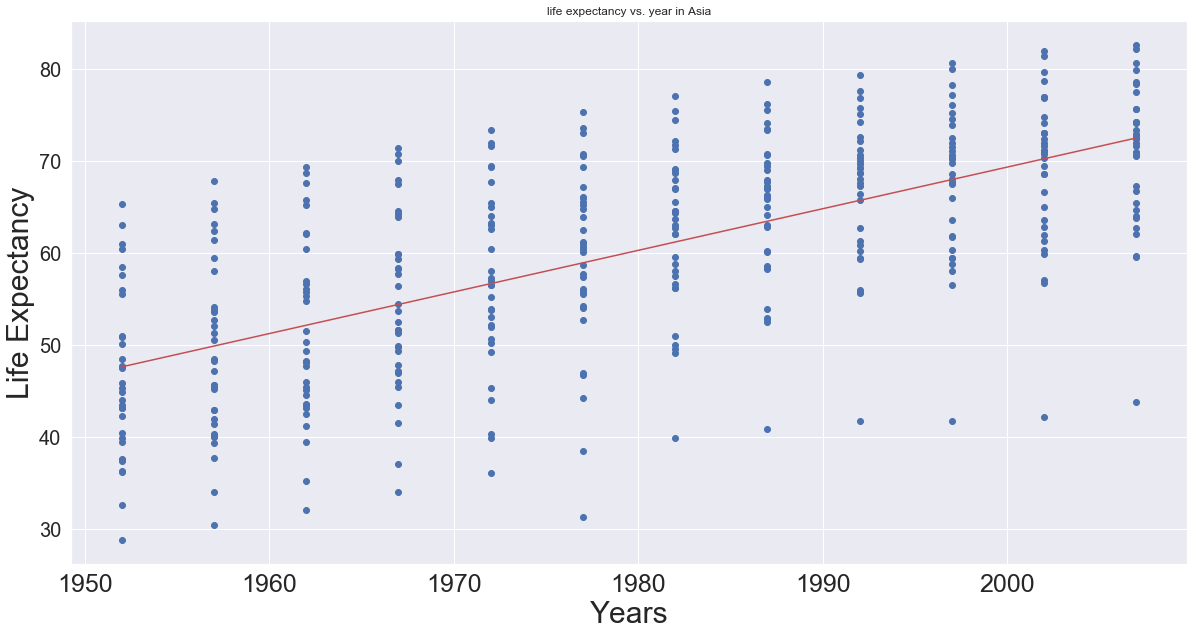

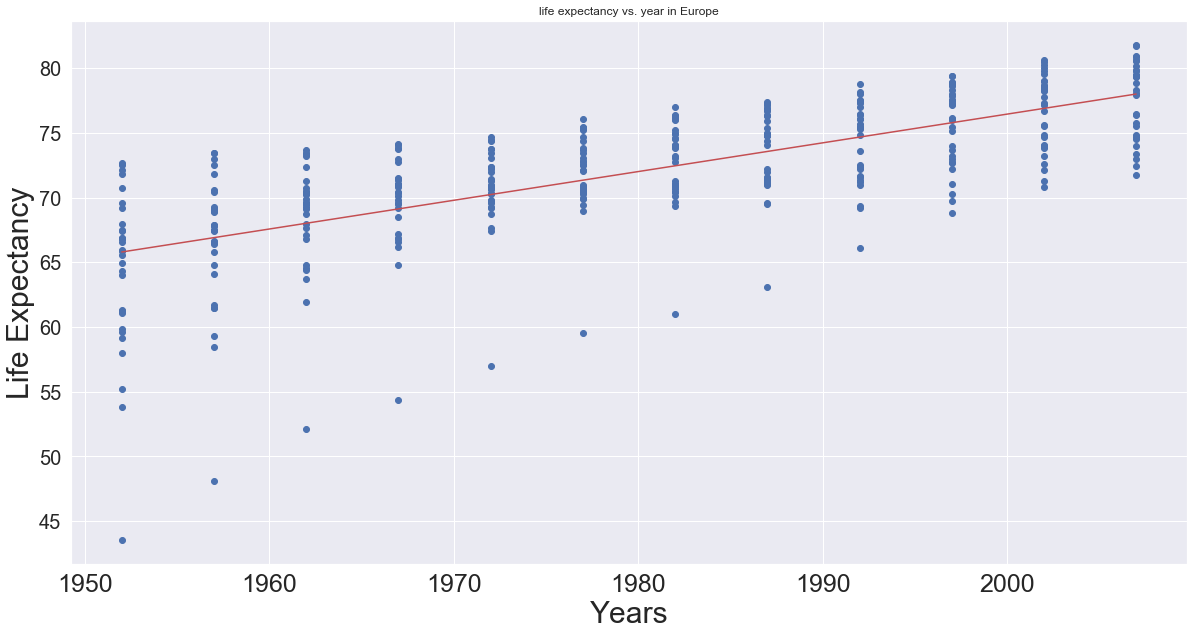

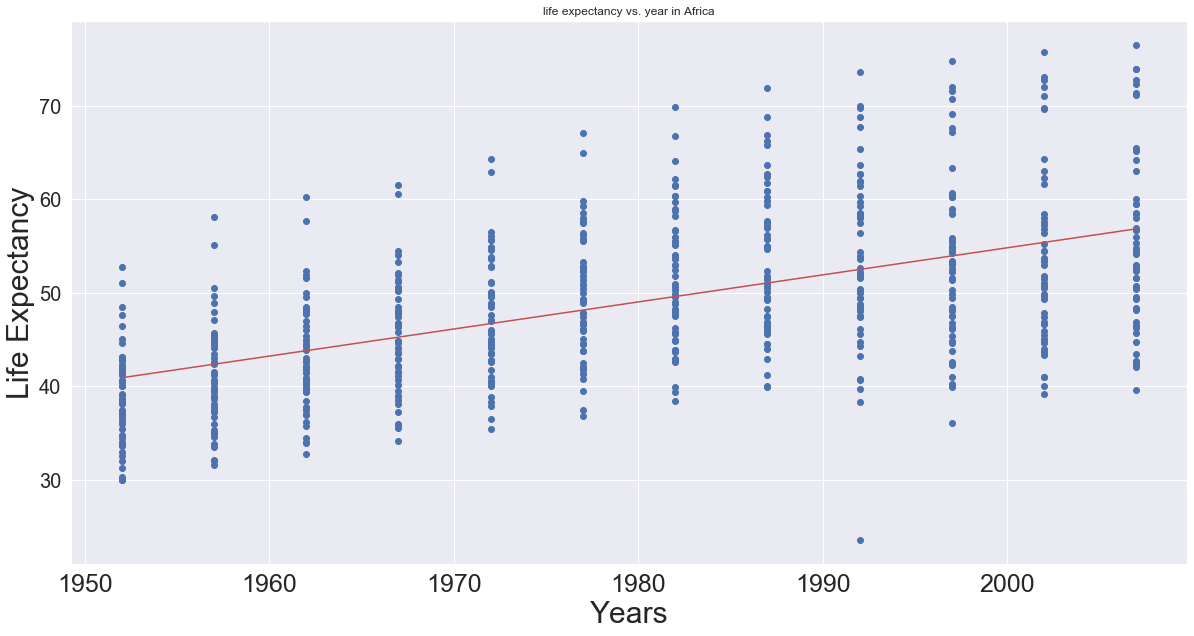

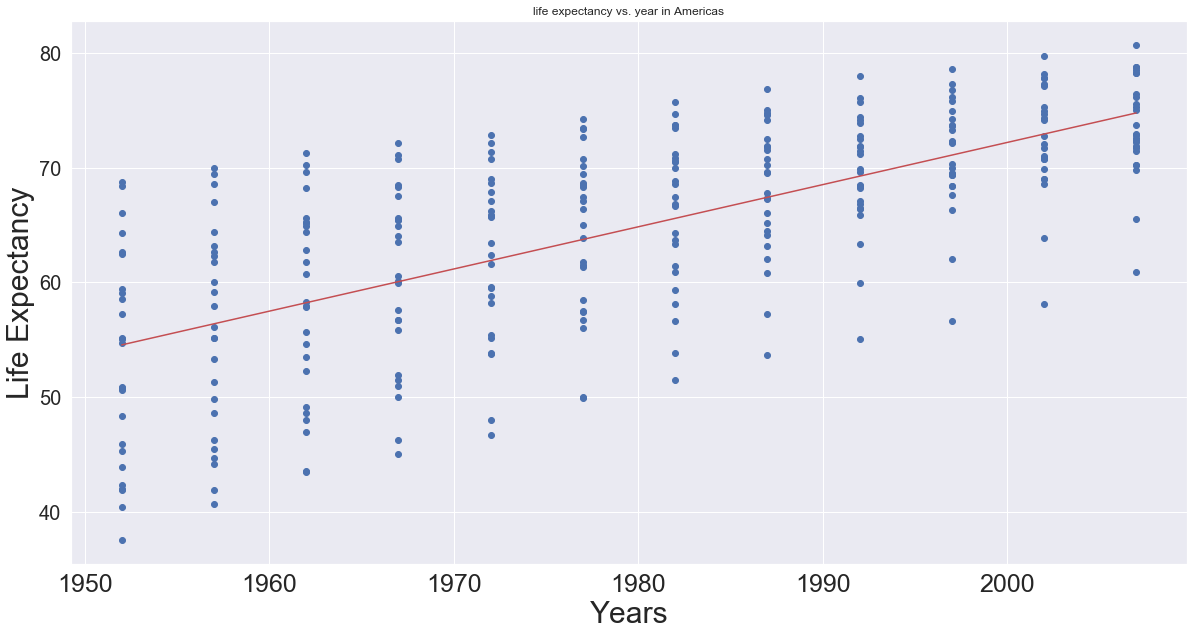

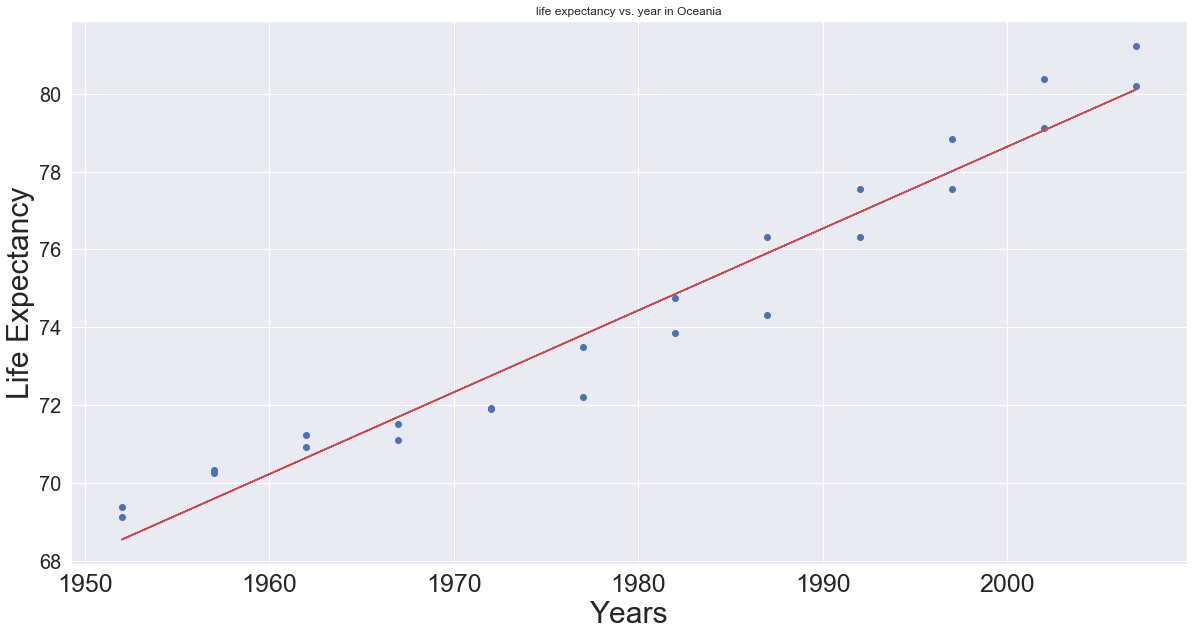

In [432]:
# Exercise 5
from scipy import stats

df5 = data.copy()
cons = df5.continent.unique()
for con in cons:
    tmp_df = df5[df5['continent'] == con]
    plt.scatter(tmp_df.year, tmp_df.lifeExp)
    plt.xlabel('Years')
    plt.ylabel('Life Expectancy')
    plt.title('life expectancy vs. year in {0}'.format(con))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(tmp_df.year, tmp_df.lifeExp)
    plt.plot(tmp_df.year, intercept + slope*tmp_df.year, 'r', label='Regression Line',linestyle = 'solid')

    
    plt.show()

In [433]:
# Question 10
# The regression model should include an interaction term of continent and year. Both of the two factors contribute to
# the change of life expectancy. Also, we can see from the five scatter plots that the slope of the regression lines
# are different, meaning which continent matters a lot to the changing of life expectancy.

In [434]:
# Exercise 6
df6 = data.copy()
outcome = sm.ols(formula="lifeExp ~ continent*year", data=df6).fit()
outcome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Wed, 03 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:21:08   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -524.2578     32.963    -15.904      0.000    -588.911    -459.605
continent[T.Americas]       -138.8484     57.851     -2.400      0.016    -252.315     -25.382
continent[T.Asia]           -312.6330     52.904     -5.909      0.000    -416.396    -208.870
continent[T.Europe]          156.8469     54.498      2.878      0.004      49.957     263.737
continent[T.Oceania]         182.3499    171.283      1.065      0.287    -153.599     518.298
year                           0.2895      0.017     17.387      0.000       0.257       0.322
continent[T.Americas]:year     0.0781      0.029      2.673      0.008       0.021       0.135
continent[T.Asia]:year         0.1636      0.027      6.121      0.000       0.111       0.216
continent[T.Europe]:year      -0.0676      0.028     -2.455      0.014      -0.122      -0.014
continent[T.Oceania]:year     -0.0793      0.087     -0.916      0.360      -0.249       0.090
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     2.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [435]:
# Question 11
# We can see from the summary table that most p-values are less than 0.05 which is close to 0 except the one of Oceania.
# The p-value of Oceania are 0.287 and 0.36, they are significantly different from 0, meaning we should not reject the
# null hypothesis in the case of Oceania. The current regression model doesn't fit the case of Oceania well.

In [436]:
# Question 12
outcome.params

# The amount of increase of each continent each year depends on the value of coefficients. Do the simple adding to find
# out for each of them.
# America: the average increase is 0.078122 + 0.289529 = 0.367651
# Asia: the average increase is 0.163593 + 0.289529 = 0.453122
# Europe: the average increase is  -0.067597 + 0.289529 = 0.221932
# Oceania: the average increase is -0.079257 + 0.289529 = 0.210272
# Africa: the average increase is  0.289529

Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
continent[T.Americas]:year      0.078122
continent[T.Asia]:year          0.163593
continent[T.Europe]:year       -0.067597
continent[T.Oceania]:year      -0.079257
dtype: float64

In [437]:
# Exercise 7
print("Model A has a F statistic of " + str(regression.fvalue) +" with p-value of " + str(regression.f_pvalue))
print("Model B has a F statistic of " + str(outcome.fvalue) +" with p-value of " + str(outcome.f_pvalue))

# Model B is better, since it has a lower p-value and a higher f statistic value, which means the model fits the data
# better, and more likely that the null hypothesis will be rejected.

Model A has a F statistic of 398.60474571176337 with p-value of 7.546794625594231e-80
Model B has a F statistic of 424.2729023400693 with p-value of 0.0


In [438]:
# Question 13
# The interaction model is significantly better than the year-only model. 
# Compare the two summary table, the interaction model has a higher R-squared and F-statistic. This makes sense because
# from the previous boxplot we did find out there is a relation between the continent and life expectancy. Now by putting
# the two factors years and continents together and creating an interaction between the two we are able to more 
# accurately model life expectancy.

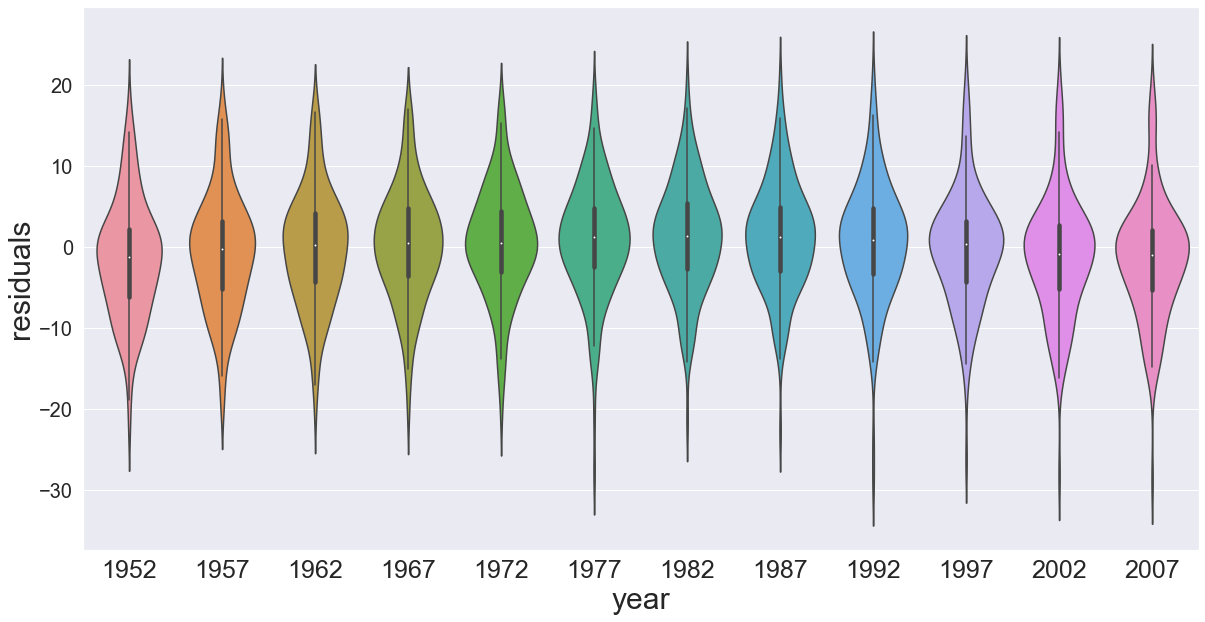

In [439]:
# Exercise 8
df8 = pd.DataFrame({'year': data2["year"].values, 'residuals': data2["lifeExp"].values-outcome.fittedvalues})

violin_residual = sns.violinplot(data=df8,
                   x = 'year',
                   y = 'residuals',
                   fliersize=50)

# The plot shows that all the violins are located around the vertical line y = 0, also they are symmetric around the
# mean. It matches the assumption.

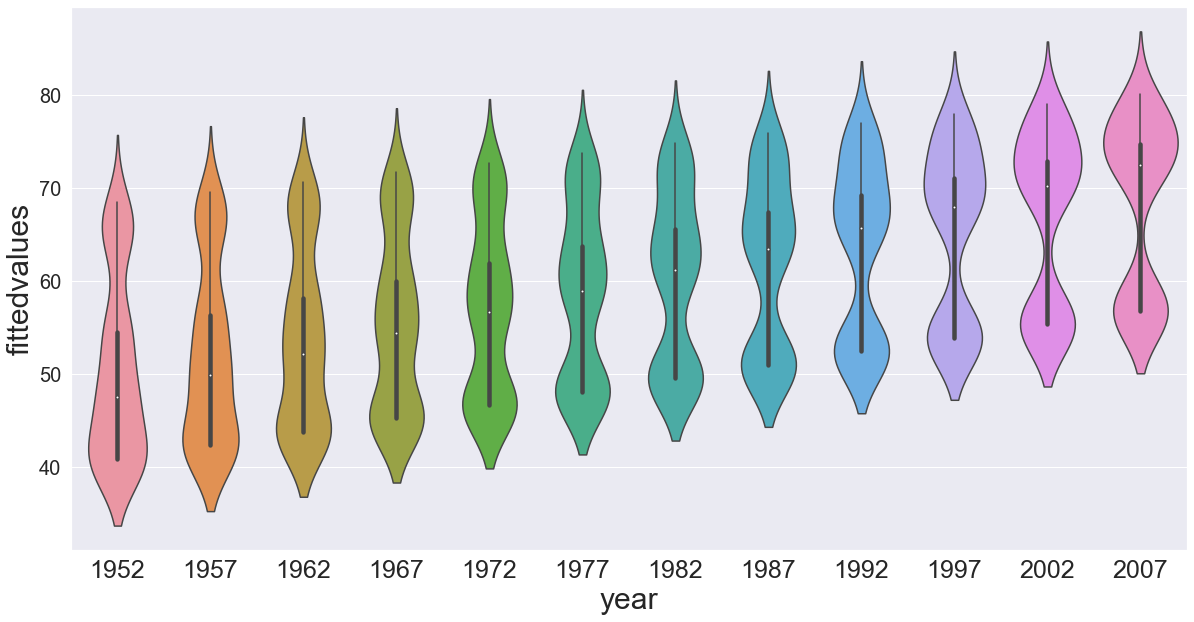

In [440]:
newdf_8 = pd.DataFrame({'year': data2["year"].values, 'fittedvalues': outcome.fittedvalues})

violin_fit = sns.violinplot(data=newdf_8,
                   x = 'year',
                   y = 'fittedvalues',
                   fliersize=50)

# It matches the assumption. The "violins" shows a linear increasing trend across the years.